# OCR Cookbook

---

## OCR Exploration and Structured Outputs
In this cookbook, we will explore the basics of OCR and leverage it together with existing models to achieve structured outputs fueled by our OCR model.

You may want to do this in case current vision models are not powerful enough, hence enhancing their vision OCR capabilities with the OCR model to achieve better structured data extraction.

---

### Model Used
- Mistral OCR
- Pixtral 12B & Ministral 8B


## Setup

First, let's install `mistralai` and download the required files.

### Download PDF and image files

## Mistral OCR with PDF

We will need to set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [ ]:
# Initialize Mistral client with API key
from mistralai import Mistral
from dotenv import load_dotenv
import os
load_dotenv()

api_key = os.getenv("MISTRAL_API_KEY")
client = Mistral(api_key=api_key)

There are two types of files you can apply OCR to:
- 1. PDF files
- 2. Image files

Let's start with a PDF file:

In [4]:
# Import required libraries
from pathlib import Path
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

# Verify PDF file exists
pdf_file = Path("psp.pdf")
assert pdf_file.is_file()

# Upload PDF file to Mistral's OCR service
uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

# Get URL for the uploaded file
signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

# Process PDF with OCR, including embedded images
pdf_response = client.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url),
    model="mistral-ocr-latest",
    include_image_base64=True
)

# Convert response to JSON format
response_dict = json.loads(pdf_response.model_dump_json())

print(json.dumps(response_dict, indent=4)[0:5000]) # check the first 1000 characters

{
    "pages": [
        {
            "index": 0,
            "markdown": "## PROLIANS MARTIN HEULIN\n\nZ.I. les Grands Mortiers\n\n10 \\& 30 rue des Grands Mortiers\n37700 SAINT-PIERRE-DES-CORPS CEDEX\nT\u00e9l.: 0247326000 - Fax : 0247632919\n\nACCUSE DE RECEPTION\nCOMMANDE CLIENT\n![img-0.jpeg](img-0.jpeg)\n\n| S\u00e9quent. Libell\u00e9 | Qt\u00e9 | $c d e \u0301 e$ | U.C. | U.P. | U.V | P.U. | $H T$ | Mtt ligne | D\u00e9lai Liv. |\n| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |\n| POLYCARBONATE UV 2FACES INCOLORE 2099 2050X1520X 4 6742 | 1,00 | F | F | A | 70,64 |  | 70,64 |  |  |\n| TUBE ROND ALD 6060 T6 6ML 30X2 | 2,00 | T | T | 6 | 15,70 |  | 31,40 |  |  |\n| 2413523 21200492 |  |  |  |  |  |  |  |  |  |\n| (DISPONIBLE EN STOCK) |  |  |  |  |  |  |  |  |  |\n| FRAISE HM CARBINE \u00d820 L. 35 QI 3219844 | 2,00 | F | F | 1 | 47,30 |  | 134,60 |  |  |\n| BUSE GAZ MIG TRES CONIQUE D11, 5 MB 25/BINZEL 2882264 | $\\begin{gathered} 10,00 \\\\ 017248 \\\\ 111

View the result with the following:

## PROLIANS MARTIN HEULIN

Z.I. les Grands Mortiers

10 \& 30 rue des Grands Mortiers
37700 SAINT-PIERRE-DES-CORPS CEDEX
Tél.: 0247326000 - Fax : 0247632919

ACCUSE DE RECEPTION
COMMANDE CLIENT
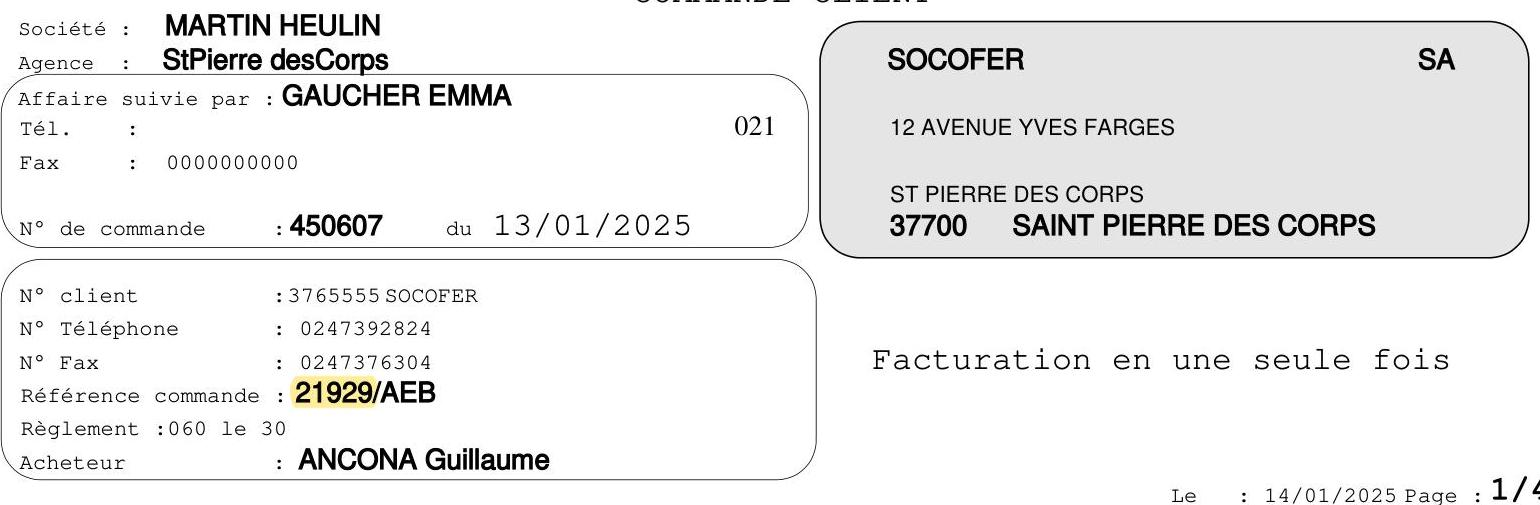

| Séquent. Libellé | Qté | $c d e ́ e$ | U.C. | U.P. | U.V | P.U. | $H T$ | Mtt ligne | Délai Liv. |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| POLYCARBONATE UV 2FACES INCOLORE 2099 2050X1520X 4 6742 | 1,00 | F | F | A | 70,64 |  | 70,64 |  |  |
| TUBE ROND ALD 6060 T6 6ML 30X2 | 2,00 | T | T | 6 | 15,70 |  | 31,40 |  |  |
| 2413523 21200492 |  |  |  |  |  |  |  |  |  |
| (DISPONIBLE EN STOCK) |  |  |  |  |  |  |  |  |  |
| FRAISE HM CARBINE Ø20 L. 35 QI 3219844 | 2,00 | F | F | 1 | 47,30 |  | 134,60 |  |  |
| BUSE GAZ MIG TRES CONIQUE D11, 5 MB 25/BINZEL 2882264 | $\begin{gathered} 10,00 \\ 017248 \\ 11192971 \end{gathered}$ | $P$ | $P$ | 1 | 5,89 |  | 58,90 | 16/01/2025 |
| BROSSE RADIATEUR COODE PLAT N20 8342458 | 12,00 | $P$ | $P$ | 1 | 1,96 |  | 23,52 | 16/01/2025 |  |
| 004886 37777668 |  |  |  |  |  |  |  |  |  |
| DISQUE NORGRIP 150X18 N835 G40 NORZON 14 TROUS 7886373 | $\begin{gathered} 600,00 \\ 002491 \end{gathered}$ | $P$ | $P$ | 2 | 44,21 |  | 265,26 | 16/01/2025 |  |
| DISQUE NORGRIP 150X18 A275 P220 14 TROUS 8023212 | $\begin{gathered} 300,00 \\ 006159 \end{gathered}$ | $P$ | $P$ | 2 | 40,95 |  | 122,85 | 16/01/2025 |  |
| CHAUSSURE SECUI BASSE STEP LEGEND NOIR S3 40 OPSIAL 7640072 | $\begin{gathered} 1,00 \\ 62010266 \end{gathered}$ | $P$ | $P$ | 1 | 56,66 |  | 56,66 | 15/01/2025 |  |
| CHAUSSURES SOUDEUR BASE WELDER BO410 P42 2947277 005009 | $\begin{gathered} 2,00 \\ 6,00 \end{gathered}$ | $P$ | $P$ | 1 | 78,91 |  | 157,82 |  |  |
| CHIFFON TEXTILE COTON COULEUR (CT 10KG) | 6,00 | $P$ | $P$ | 1 | 10,34 |  | 62,04 | 15/01/2025 |  |

## PROLIANS MARTIN HEULIN

Z.I. les Grands Mortiers

10 \& 30 rue des Grands Mortiers
37700 SAINT-PIERRE-DES-CORPS CEDEX
Tél.: 0247326000 - Fax : 0247632919

ACCUSE DE RECEPTION
COMMANDE CLIENT
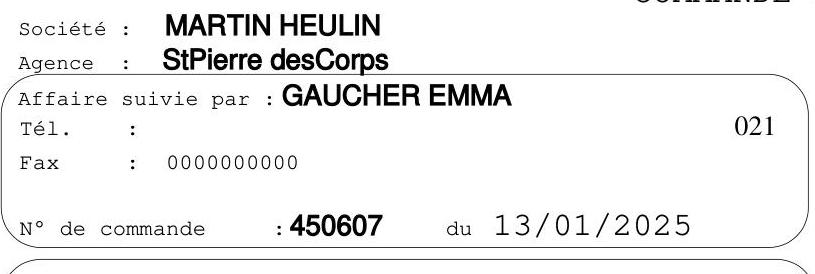

## SOCOFER

12 AVENUE YVES FARGES
ST PIERRE DES CORPS
37700 SAINT PIERRE DES CORPS

N* client : 3765555 SOCOFER
$\mathrm{N}^{\circ}$ Téléphone : 0247392824
$\mathrm{N}^{\circ}$ Fax : 0247376304
Référence commande : 21929/AEB
Règlement : 060 le 30
Acheteur : ANCONA Guillaume

Facturation en une seule fois

Le : 14/01/2025 Page : 2/4 EUROS

| Séquent. Libellé | Qté | c | U. | C | U. | V | P.U. | H | M |  |  |  | M |  |  |  | D |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 6505279 | 27290108 |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
| REGLET INOX FLEX 2 FACE 300MM DELA. 1051.300 7309775 |  | 5,00 | F | P | 1 |  | 2,81 |  | 14,05 |  |  |  |  |  |  |  |
|  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
|  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
| LAMPE LED PORTABLE $10 \times 1$ RECHARGEABLE 7689772 |  | 5,00 | F | P | 1 |  | 36,36 |  | 181,80 |  |  |  |  |  |  |  |
|  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
| ECO-PARTICIPATION DEEE 6600034 |  | 5,00 |  | P | 1 |  | 0,02 |  |  |  |  |  |  |  |  |  |
| TARAUD MACHINE HSS GUN ISO529 TECHNIC D3X50 2702827 |  | 5,00 | F | P | 1 |  | 5,29 |  |  |  |  |  |  |  |  |  |
|  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
| TARAUD MACHINE HSS GUN ISO529 TECHNIC D4X70 2702835 |  | 5,00 | F | P | 1 |  | 5,38 |  |  |  |  |  |  |  |  |  |
|  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
| 003391 |  | 5,00 | F | P | 1 |  | 5,29 |  |  |  |  |  |  |  |  |  |
| 10203147 |  | 5,00 | F | P | 1 |  | 5,29 |  |  |  |  |  |  |  |  |  |
| TARAUD MACHINE HSS GUN ISO529 TECHNIC D5X80 2702843 |  | 5,00 | F | P | 1 |  | 5,29 |  |  |  |  |  |  |  |  |  |
|  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
| 005847 |  | 5,00 | F | P | 1 |  | 5,97 |  |  |  |  |  |  |  |  |  |
| SEMELLE ANTI-PATIGUE AMORT CHOC ANTISTATIQ 40/41 7321686 |  | 5,00 | F | P | 1 |  | 5,97 |  |  |  |  |  |  |  |  |  |
|  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
| 57510390 |  | 5,00 | F | P | 1 |  | 5,97 |  |  |  |  |  |  |  |  |  |
| SEMELLE ANTI-PATIGUE AMORT CHOC ANTISTATIQ 42/43 7321694 |  | 10,00 | F | P | 1 |  | 5,97 |  |  |  |  |  |  |  |  |  |
|  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
| 57510404 |  | 5,00 | F | P | 1 |  | 5,97 |  |  |  |  |  |  |  |  |  |
| SEMELLE ANTI-PATIGUE AMORT CHOC ANTISTATIQ 44/45 |  | 5,00 | F | P | 1 |  | 5,97 |  |  |  |  |  |  |  |  |  |

## PROLIANS MARTIN HEULIN

Z.I. les Grands Mortiers

10 \& 30 rue des Grands Mortiers
37700 SAINT-PIERRE-DES-CORPS CEDEX
Tél.: 0247326000 - Fax : 0247632919

ACCUSE DE RECEPTION
COMMANDE CLIENT
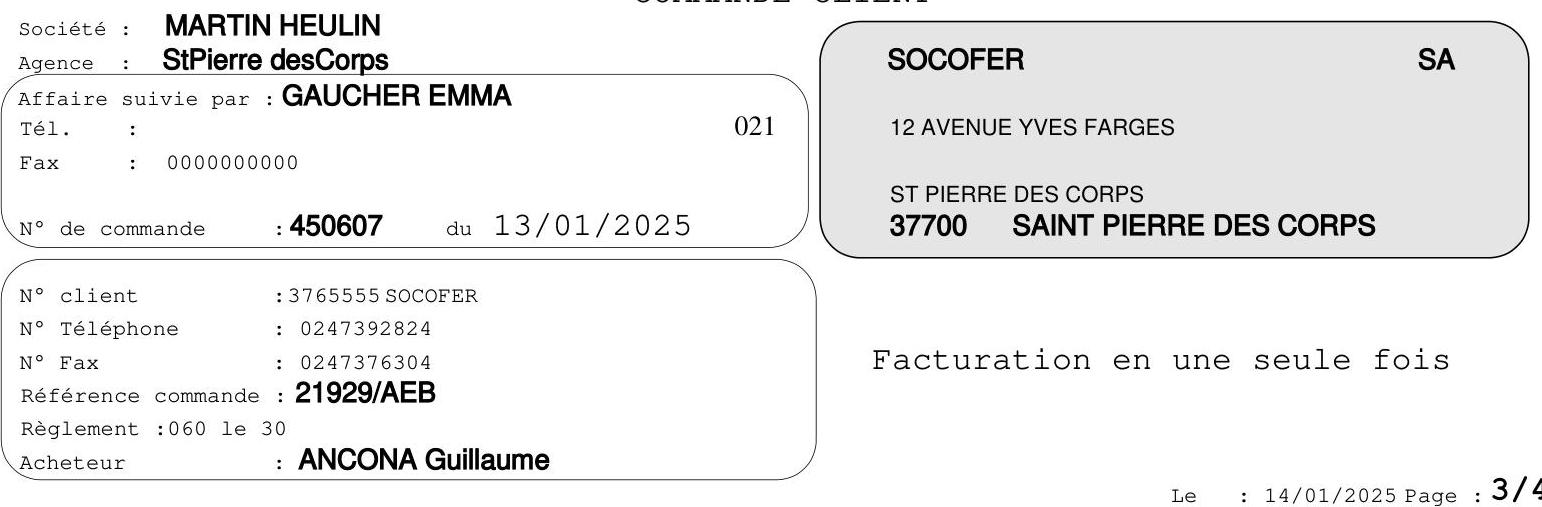

| Séguent. Libellé | Qté | $c d e ́ e$ | U.C. | U.P. | U.V | P.U. | $H T$ | Mtt ligne | Délai Liv. |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 7321708 006147 |  |  |  |  |  |  |  |  |  |
| 57510412 |  |  |  |  |  |  |  |  |  |
| FORET HSS Q.CYL. COURT TSX D5 | 10,00 | F | P | 1 | 0,96 | 9,60 |  |  |  |
| 6426638 |  |  |  |  |  |  |  |  |  |
|  |  |  |  |  |  |  |  |  |  |
| MASQUE COQUE AIR FIT FFP2D AVEC SOUFAPE OPSIAL | 40,00 | F | P | 1 | 1,41 | 56,40 | 15/01/2025 |  |  |
| 7310854 012285 |  |  |  |  |  |  |  |  |  |
| 58224294 |  |  |  |  |  |  |  |  |  |
| NETTOYANT FREIN PUISSANT SECHAGE RAP AE650/500ML | 12,00 | F | P | 1 | 4,38 | 52,56 | 15/01/2025 |  |  |
| 6705774 |  |  |  |  |  |  |  |  |  |
|  |  |  |  |  |  |  |  |  |  |
| PINCEAU QUEUE MORUE LAQUER MOYEN N20 SOIE BLC | 10,00 | F | P | 1 | 1,12 | 11,20 | 16/01/2025 |  |  |
| 6551998 004891 |  |  |  |  |  |  |  |  |  |
| 12768060 |  |  |  |  |  |  |  |  |  |
| PINCEAU QUEUE MORUE LAQUER MOYEN N30 SOIE BLC | 10,00 | F | P | 1 | 1,35 | 13,50 | 16/01/2025 |  |  |
| 6552013 002461 |  |  |  |  |  |  |  |  |  |
| 12768052 |  |  |  |  |  |  |  |  |  |
| BROSSE PINCEAU S/T N.TORSADE PBOR 2525/6 INX 0,20 | 20,00 | F | P | 1 | 10,77 | 215,40 |  |  |  |
| 8046689 006153 |  |  |  |  |  |  |  |  |  |
| 18355396 |  |  |  |  |  |  |  |  |  |
| BROSSE CIRCULAIRE TIGE D. 60 FIL 0,20 INOX | 20,00 | F | P | 1 | 25,65 | 513,00 | 15/01/2025 |  |  |
| 7973683 006152 |  |  |  |  |  |  |  |  |  |
| 24397084 |  |  |  |  |  |  |  |  |  |
| DISQUE FIBRE 125822 F996 CERAMIQUE P36 | 100,00 | F | P | 2 | 149,87 | 149,87 | 15/01/2025 |  |  |
| 7227507 012055 |  |  |  |  |  |  |  |  |  |

# PROLIANS 

## PROLIANS MARTIN HEULIN

Z.I. les Grands Mortiers
$10 \& 30$ rue des Grands Mortiers
37700 SAINT-PIERRE-DES-CORPS CEDEX
Tél.: 0247326000 - Fax : 0247632919

## ACCUSE DE RECEPTION <br> COMMANDE CLIENT

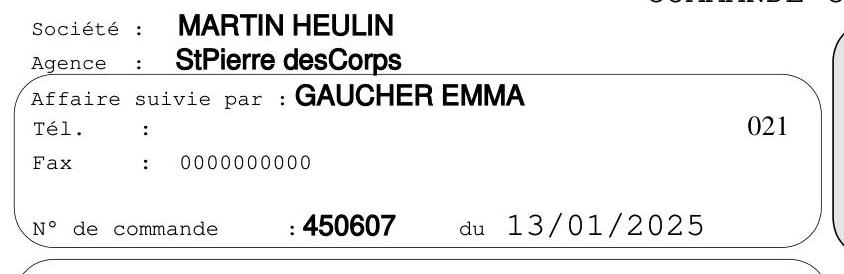

## SOCOFER

12 AVENUE YVES FARGES
ST PIERRE DES CORPS
37700 SAINT PIERRE DES CORPS

## N* client : 3765555 SOCOFER

N* Téléphone : 0247392824
$\mathrm{N}^{*}$ Fax : 0247376304
Référence commande : 21929/AEB
Règlement : 060 le 30
Acheteur : ANCONA Guillaume

## Sécurité : 3765555 SOCOFER

N* Fек
: 0247376304
Référence commande : 21929/AEB
Règlement : 060 le 30
Acheteur : ANCONA Guillaume

## Facturation en une seule fois

Le : 14/01/2025 Page : $4 / 4$ EUROS

| Séquent. Libellé | Qté |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  | 

In [5]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    """
    Replace image placeholders in markdown with base64-encoded images.

    Args:
        markdown_str: Markdown text containing image placeholders
        images_dict: Dictionary mapping image IDs to base64 strings

    Returns:
        Markdown text with images replaced by base64 data
    """
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(
            f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})"
        )
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
    """
    Combine OCR text and images into a single markdown document.

    Args:
        ocr_response: Response from OCR processing containing text and images

    Returns:
        Combined markdown string with embedded images
    """
    markdowns: list[str] = []
    # Extract images from page
    for page in ocr_response.pages:
        image_data = {}
        for img in page.images:
            image_data[img.id] = img.image_base64
        # Replace image placeholders with actual images
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))

    return "\n\n".join(markdowns)

# Display combined markdowns and images
display(Markdown(get_combined_markdown(pdf_response)))

## Mistral OCR with Image

In addition to the PDF file shown above, Mistral OCR can also process image files:

In [9]:
import base64

# Verify image exists
image_file = Path("receipt.png")
assert image_file.is_file()

# Encode image as base64 for API
encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

# Process image with OCR
image_response = client.ocr.process(
    document=ImageURLChunk(image_url=base64_data_url),
    model="mistral-ocr-latest"
)

# Convert response to JSON
response_dict = json.loads(image_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "pages": [
        {
            "index": 0,
            "markdown": "# PLACE FACE UP ON DASH <br> CITY OF PALO ALTO <br> NOT VALID FOR ONSTREET PARKING \n\nExpiration Date/Time 11:59 PM\n\nAUG 19, 2024\n\nPurchase Date/Time: 01:34pm Aug 19, 2024\nTotal Due: $\\$ 15.00$\nRate: Daily Parking\nTotal Paid: $\\$ 15.00$\nPmt Type: CC (Swipe)\nTicket \\#: 00005883\nS/N \\#: 520117260957\nSetting: Permit Machines\nMach Name: Civic Center\n\\#*****-1224, Visa\nDISPLAY FACE UP ON DASH\n\nPERMIT EXPIRES\nAT MIDNIGHT",
            "images": [],
            "dimensions": {
                "dpi": 200,
                "height": 3210,
                "width": 1806
            }
        }
    ],
    "model": "mistral-ocr-2503-completion",
    "usage_info": {
        "pages_processed": 1,
        "doc_size_bytes": 3110191
    }
}


## Extract structured data from OCR results

OCR results can be further processed using another model.

Our goal is to extract structured data from these results. To achieve this, we will utilize the `pixtral-12b-latest` model, supported by our OCR model, to deliver better and higher-quality answers:

In [7]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))

{
    "parking_receipt": {
        "instructions": "PLACE FACE UP ON DASH",
        "city": "CITY OF PALO ALTO",
        "validity": "NOT VALID FOR ONSTREET PARKING",
        "expiration": {
            "date": "AUG 19, 2024",
            "time": "11:59 PM"
        },
        "purchase": {
            "date": "Aug 19, 2024",
            "time": "01:34pm"
        },
        "amounts": {
            "total_due": "$15.00",
            "total_paid": "$15.00"
        },
        "rate": "Daily Parking",
        "payment_type": "CC (Swipe)",
        "ticket_number": "00005883",
        "serial_number": "520117260957",
        "settings": {
            "type": "Permit Machines",
            "machine_name": "Civic Center"
        },
        "card_details": {
            "card_number": "^^^^-1224",
            "type": "Visa"
        },
        "expiry_message": "PERMIT EXPIRES AT MIDNIGHT"
    }
}


In the example above, we are leveraging a model already capable of vision tasks.

However, we could also use text-only models for the structured output. Note in this case, we do not include the image in the user message:

In [8]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="ministral-8b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))


{
    "expiration_date_time": "11:59 PM",
    "expiration_date": "AUG 19, 2024",
    "purchase_date_time": "01:34pm Aug 19, 2024",
    "total_due": 15.0,
    "rate": "Daily Parking",
    "total_paid": 15.0,
    "payment_type": "CC (Swipe)",
    "ticket_number": "00005883",
    "serial_number": "520117260957",
    "setting": "Permit Machines",
    "machine_name": "Civic Center",
    "card_number": "1224",
    "card_type": "Visa"
}


## All Together - Mistral OCR + Custom Structured Output
Let's design a simple function that takes an `image_path` file and returns a JSON structured output in a specific format. In this case, we arbitrarily decided we wanted an output respecting the following:

```python
class StructuredOCR:
    file_name: str  # can be any string
    topics: list[str]  # must be a list of strings
    languages: str  # string
    ocr_contents: dict  # any dictionary, can be freely defined by the model
```

We will make use of [custom structured outputs](https://docs.mistral.ai/capabilities/structured-output/custom_structured_output/).

In [ ]:
from enum import Enum
from pathlib import Path
from pydantic import BaseModel
import base64


# class StructuredOCR(BaseModel):
#     file_name: str
#     topics: list[str]
#     languages: str
#     ocr_contents: dict

class StructuredOCR(BaseModel):
    file_name: str
    ocr_contents: dict

def structured_ocr(image_path: str) -> StructuredOCR:
    """
    Process an image using OCR and extract structured data.

    Args:
        image_path: Path to the image file to process

    Returns:
        StructuredOCR object containing the extracted data

    Raises:
        AssertionError: If the image file does not exist
    """
    # Validate input file
    image_file = Path(image_path)
    assert image_file.is_file(), "The provided image path does not exist."

    # Read and encode the image file
    encoded_image = base64.b64encode(image_file.read_bytes()).decode()
    base64_data_url = f"data:image/jpeg;base64,{encoded_image}"

    # Process the image using OCR
    image_response = client.ocr.process(
        document=ImageURLChunk(image_url=base64_data_url),
        model="mistral-ocr-latest"
    )
    image_ocr_markdown = image_response.pages[0].markdown
    fields_to_extract = open("prompt/demoussis_industrie.md").read()

    # Parse the OCR result into a structured JSON response
    chat_response = client.chat.parse(
        model="pixtral-12b-latest",
        messages=[
            {
                "role": "user",
                "content": [
                    ImageURLChunk(image_url=base64_data_url),
                    TextChunk(text=(
                        f"Ceci est l'OCR de l'image au format markdown:\n{image_ocr_markdown}\n.\n"
                        "Converti la en une réponse structurée au format JSON "
                        "avec le contenu de l'OCR dans un dictionnaire sensé."
                        "Extrait les champs suivant dans une réponse au format JSON"
                        f"et sélectionne dans les champs les informations qui correspondent à l'exemple:\n{fields_to_extract}\n."
                        )
                    )
                ]
            }
        ],
        response_format=StructuredOCR,
        temperature=0
    )

    return chat_response.choices[0].message.parsed

# Example usage
image_path = "page_002.jpg" # Path to sample receipt image
structured_response = structured_ocr(image_path) # Process image and extract data

# Parse and return JSON response
response_dict = json.loads(structured_response.model_dump_json())


We can now extract structured output from any image parsed with our OCR model.

In [13]:
# Example usage
image_path = "page_001.png" # Path to sample receipt image
structured_response = structured_ocr(image_path) # Process image and extract data

# Parse and return JSON response
response_dict = json.loads(structured_response.model_dump_json())
print(json.dumps(response_dict, indent=4))

{
    "commande_name": "AR DE COMMANDE",
    "qte": "21854",
    "puht": "VIREMENT 45 JOURS FIN DE MOIS",
    "ocr_contents": {
        "affaire": [
            {
                "piece_designation": "SOCO-A0312-E02PL07A\nS355JR*DKP 8,00 mm\n$98,00 \\times 49,00\nSuivant notre devis N\u00b0 : 27458-1\nChanf r\u00e9alis\u00e9 par meulage, tol\u00e9rance +/- 1",
                "qte": 8,
                "puht": "8,42 \u20ac",
                "prix_total": "51,36 \u20ac",
                "dela": "21/01/25"
            },
            {
                "piece_designation": "SOCO-COW002-01PP06A\nS355JR*DKP 10,00 mm\n220,00x220,00\nSuivant notre devis N\u00b0 : 27458-1\nTaraudage M5 Plan PDF non mis \u00e0 jour par vos soins avec M5",
                "qte": 2,
                "puht": "22,01 \u20ac",
                "prix_total": "44,02 \u20ac",
                "dela": "21/01/25"
            },
            {
                "piece_designation": "SOCO-COW002-01PP19A\nS355JR*DKP 3,00 mm\n143,10 

The original image for comparison can be found below.

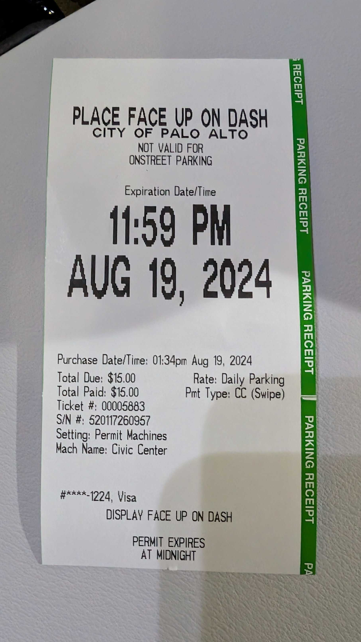

In [11]:
from PIL import Image

image = Image.open(image_path)
image.resize((image.width // 5, image.height // 5))
